<H1> Resultado das eleições municipais - Salinas(MG) 2024 </H1>

Apenas um detalhamento dos votos por seção e local de votação. 

<b> Obs: Os links não funcionam no github. Para uma navegação melhor tente <a href="https://nbviewer.org/github/nfmmendes/eleicoes-salinas-2024/blob/master/Resultado%20elei%C3%A7%C3%B5es%20municipais%20-%20Salinas%28MG%29%202024.ipynb"> este site </a>

* [Resultados da eleição de prefeito](#resultados-prefeito)
    * [Resultados agrupados por local de votação](#prefeito-por-local)
    * [Resultados agrupados por seção](#prefeito-por-secao)
* [Resultados da eleição de vereador](#resultados-vereador)
    * [Resultados agrupados por candidato](#resultado-por-candidato)
    * [Resultados agrupados por local](#resultado-por-local)
* [Resultados por partido](#resultado-por-partido)
    * [Votação dos partidos por local de votação](#resultado-partido-por-local)
    * [Votação de cada local dividida por partido](#resultado-local-por-partido)
    * [Votação de cada candidato dentro do partido](#votacao-dentro-partido)


<H2> Resultados da eleição de prefeito </H2>
<a id="resultados-prefeito"></a>
<p> Obs: Os votos para Anderson Brito foram computados como nulos no resultado final. </p>

In [6]:
import pandas as pd
import math
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

# LE DADOS
df = pd.read_csv("prefeito-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
pd.set_option('display.max_rows', len(df) + 1)

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df[["LOCAL", "CANDIDATO", "VOTOS"]].groupby(by=["LOCAL", "CANDIDATO"]).sum()

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

dg["TOTAL"] = dg.sum(axis=1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)

# CRIA COLUNAS DE PERCENTUAL
for c in dg.columns[:-1]:
    dg[c + " (%) "] = round(100*dg[c]/dg["TOTAL"], 2)

# PARA FORMATAR VALORES DECIMAIS
colunas_percentagem = [ x for x in dg.columns if dg[x].dtype =="float"]
colunas_absoluto = dg.loc[:, :"TOTAL"].columns[:-1]

# CRIA ESTILO PARA TOTAL
total_style = pd.Series("font-weight: bold;", index=["TOTAL"])


<h3> Resultados agrupados por local de votação </h3>
<a id="prefeito-por-local"></a>

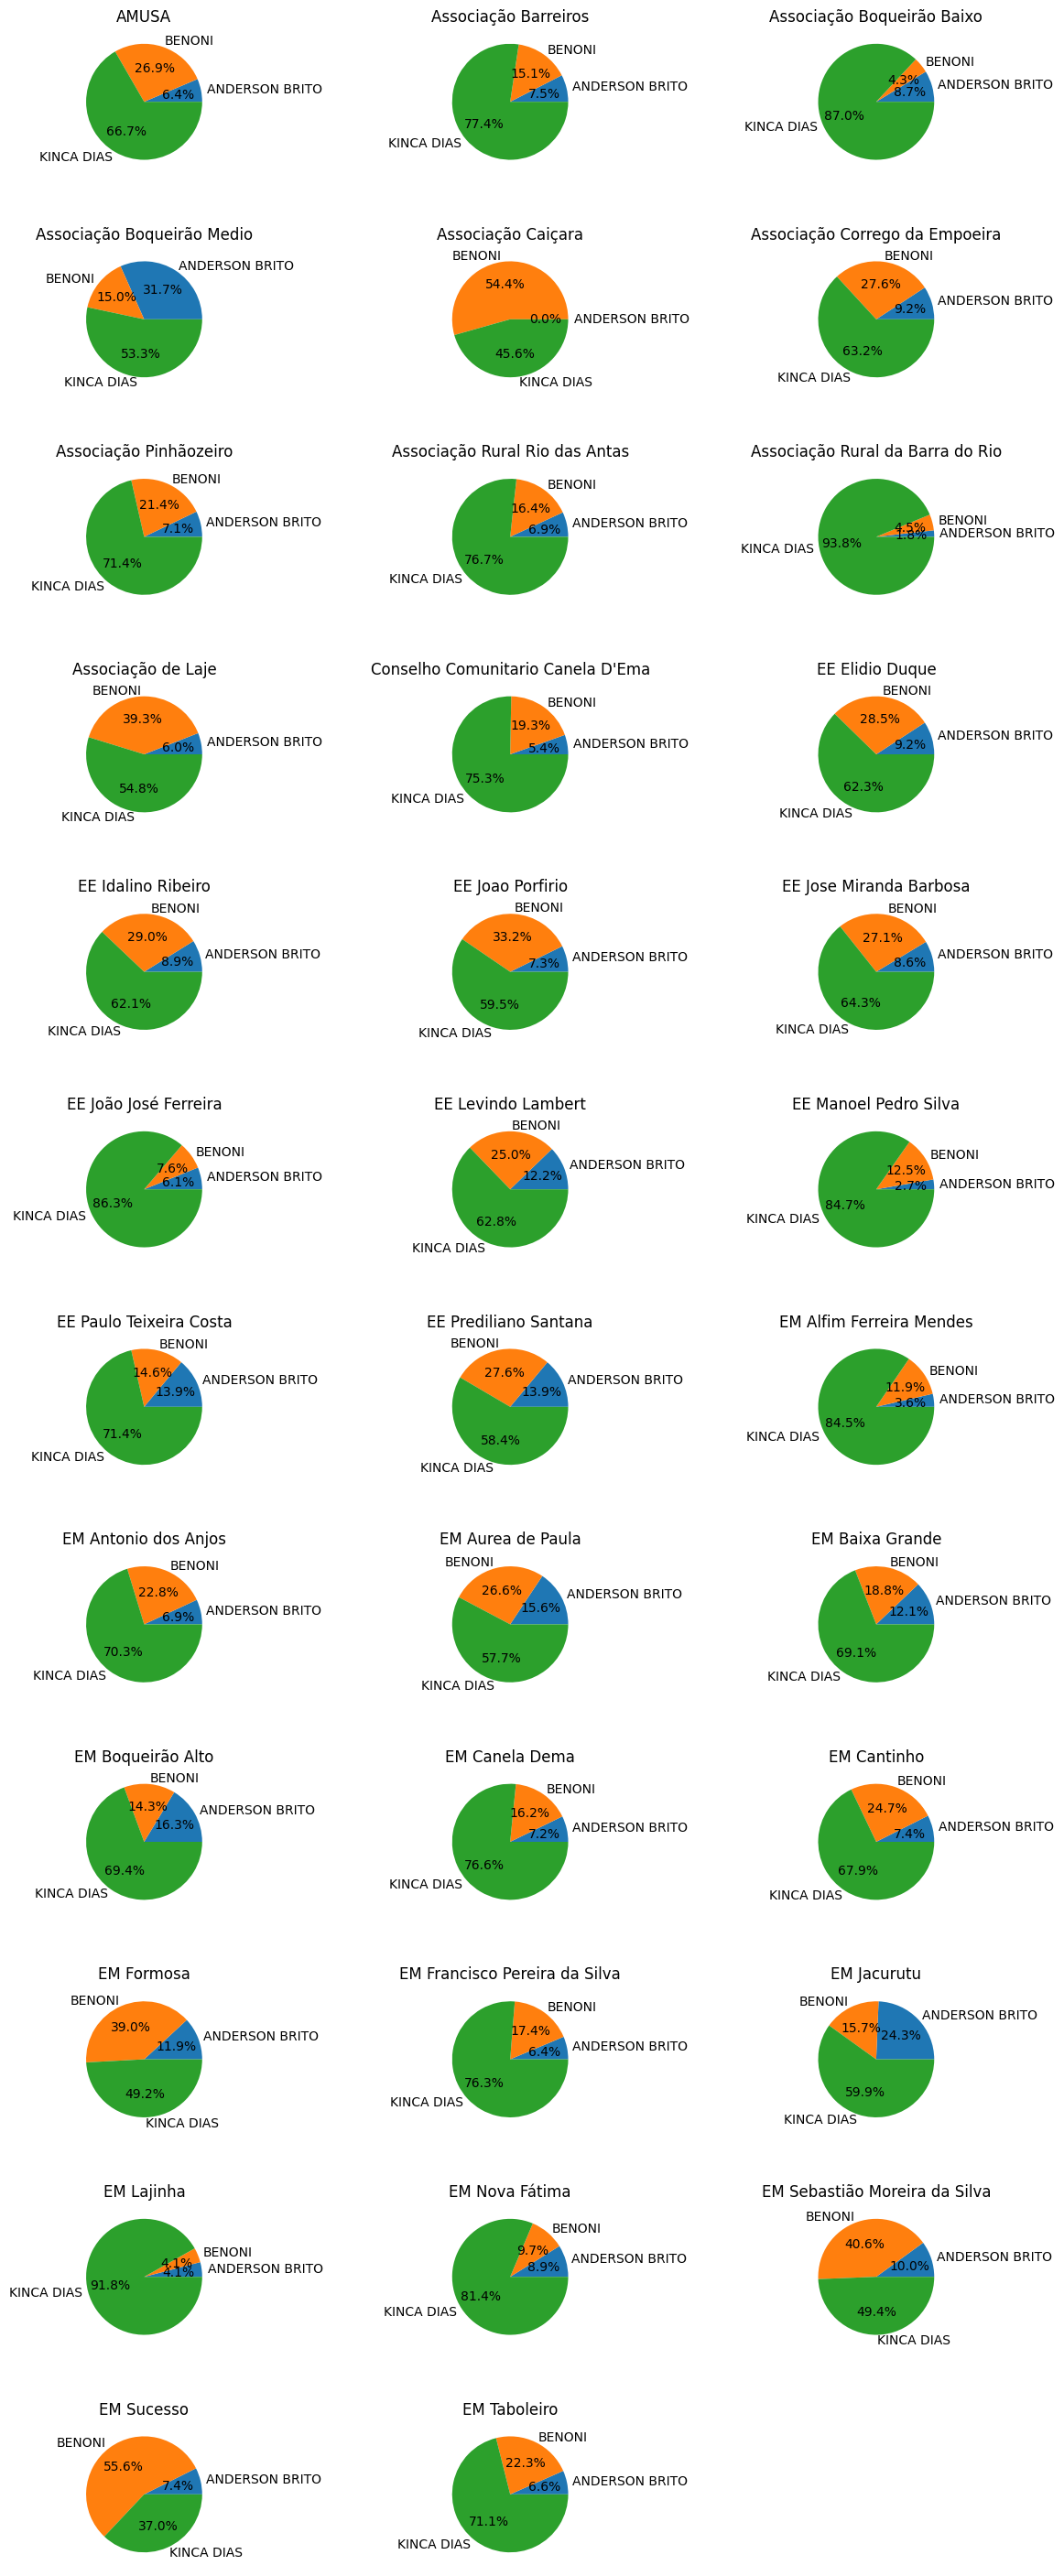

In [9]:
numero_de_locais = len(dg.index) - 1
size_grid = 3
fig, ax = plt.subplots(math.ceil(numero_de_locais/size_grid), size_grid, figsize=(14, 36))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

for index, row in dg.iloc[:-1][colunas_absoluto].reset_index().iterrows():
    ax[int(index/size_grid)][index%size_grid].pie(row[colunas_absoluto], labels = colunas_absoluto, autopct='%1.1f%%');
    ax[int(index/size_grid)][index%size_grid].set_title(row['LOCAL'])

for index in range(math.ceil(numero_de_locais/size_grid)*size_grid):
    if index >= numero_de_locais:
        ax[int(index/size_grid)][index%size_grid].remove()

In [10]:
# APLICA ESTILOS E MOSTRA TABELA
dg.style.apply(lambda s: total_style, axis=1).highlight_max(color = 'lightgreen', axis = 1, subset=colunas_absoluto).\
highlight_max(color = 'lightgreen', axis = 1, subset=colunas_percentagem).format(na_rep='PASS', precision=2, subset=colunas_percentagem)



,ANDERSON BRITO,BENONI,KINCA DIAS,TOTAL,ANDERSON BRITO (%),BENONI (%),KINCA DIAS (%)
LOCAL,,,,,,,
AMUSA,5,21,52,78,6.41,26.92,66.67
Associação Barreiros,4,8,41,53,7.55,15.09,77.36
Associação Boqueirão Baixo,4,2,40,46,8.70,4.35,86.96
Associação Boqueirão Medio,19,9,32,60,31.67,15.00,53.33
Associação Caiçara,0,31,26,57,0.00,54.39,45.61
Associação Corrego da Empoeira,7,21,48,76,9.21,27.63,63.16
Associação Pinhãozeiro,3,9,30,42,7.14,21.43,71.43
Associação Rural Rio das Antas,11,26,122,159,6.92,16.35,76.73
Associação Rural da Barra do Rio,2,5,105,112,1.79,4.46,93.75


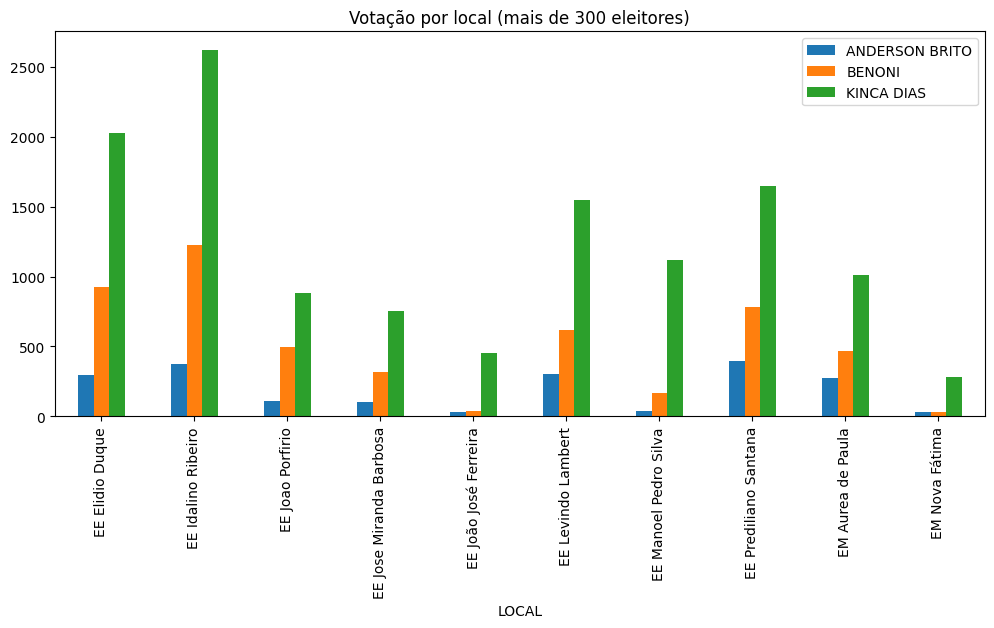

In [11]:
dg_locais_grandes = dg[dg["TOTAL"] >= 300][colunas_absoluto].copy(deep=True)
dg_locais_grandes[0:-1].plot(kind='bar', figsize=(12, 5), title="Votação por local (mais de 300 eleitores)");

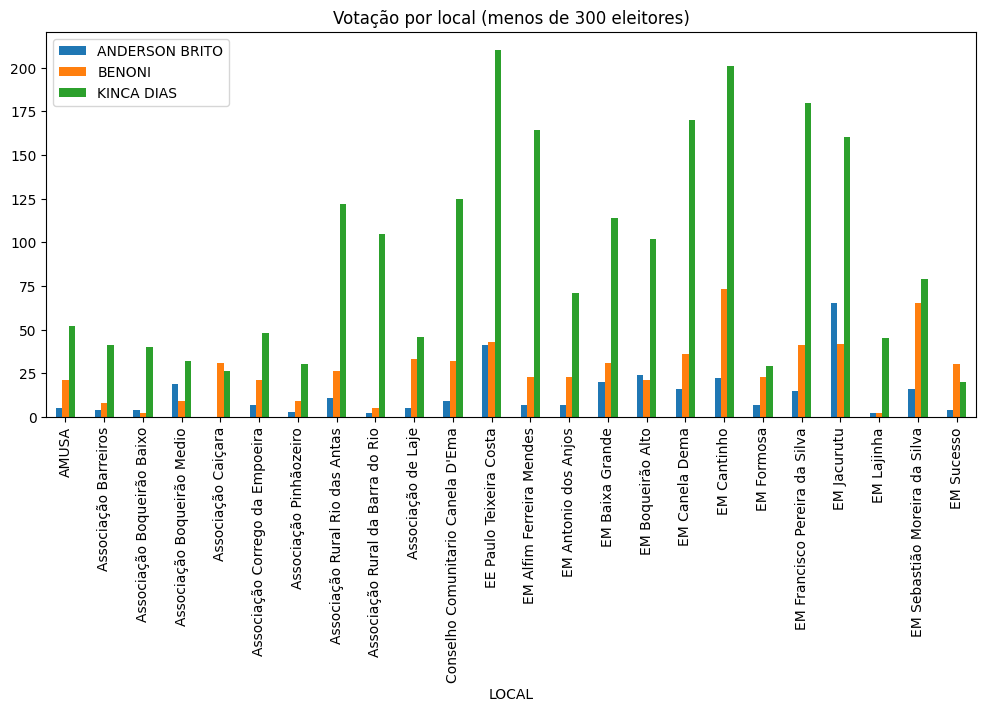

In [12]:
dg_locais_pequenos = dg[dg["TOTAL"] < 300][colunas_absoluto].copy(deep=True)
dg_locais_pequenos[0:-1].plot(kind='bar', figsize=(12, 5), title="Votação por local (menos de 300 eleitores)");

In [13]:
# FUNCAO PARA DEFINIR AS CORES DA PRIMEIRA COLUNA
def color(x):
    no_repetitions = x.unique()
    return ["background-color: #f5f5f5; background: #f5f5f5" if np.where(no_repetitions == el)[0]%2 == 0 \
            else "background-color: #ffffff; background: #ffffff" for  index, el in x.items()]

In [14]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df.groupby(by=["LOCAL", "CANDIDATO", "SECAO"]).sum()

# CRIA UM AGRUPAMENTO SEM A SEÇÃO
dg1 = dg.groupby(["LOCAL", "CANDIDATO"]).sum()

# CRIA UM INDICE DO AGRUPAMENTO SUBSTITUINDO A SECAO POR TOTAL 
dg1.index = [dg1.index.get_level_values(0),
             dg1.index.get_level_values(1),
             ['Total'] * len(dg1)]

# INSERE AS LINHAS COM O INDICE "TOTAL" NA TABELA ORIGINAL E ORDENA POR LOCAL E CANDIDATO
dg = pd.concat([dg, dg1]).sort_index(level=[0,1])

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-3, -1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values / 2

# RENOMEIA CABECALHO DA COLUNA DE INDICES
dg.index.names = ["LOCAL", "SECAO"]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dg = dg.style.apply_index(color, axis=0, level =[0])


<H3> Resultados detalhados por seção </H3>
<a id="prefeito-por-secao"></a>

In [16]:
# MOSTRA TABELA
display(dg)


<H2> Resultados da eleição de vereador </H2>
<a id="resultados-vereador"></a>
<p> Obs: Os dados sobre coligação/federação/partidos são facilmente cosultáveis <a href="https://resultados.tse.jus.br/oficial/app/index.html#/divulga/votacao-de-partidos;e=619;cargo=13;uf=mg;mu=51390"> aqui </a>. Nessa tabela a intenção é apenas mostrar a votação em cada local. </p>
<p> Na coluna seção aparece todas as seções em que o candidato foi votado em um lugar (para locais com mais de uma seção eleitoral) </p>

<H3> Resultados agrupados por candidato </H3>
<a id="resultado-por-candidato"></a>

In [17]:
# LE DADOS
df = pd.read_csv("vereador-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
numero_candidatos = len(df["CANDIDATO"].unique())
pd.set_option('display.max_rows', len(df) + 1)
pd.set_option('display.max_columns', numero_candidatos + 1)

df["SECAO"] = df["SECAO"].apply(lambda x : str(x) + " ")

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["CANDIDATO"]).apply(lambda x : x.groupby(by=["LOCAL"]).sum()\
                                         .sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<H3> Resultados agrupados por local </h3>
<a id="resultado-por-local"></a>

In [18]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["LOCAL"]).apply(lambda x : x.groupby(by=["CANDIDATO"])\
                                     .sum().sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<H2> Resultados por partido </H2>
<a id="resultado-por-partido"></a>

<p> Obs: Votos para a legenda (cerca de 1000 no total) não foram inclusos </p>

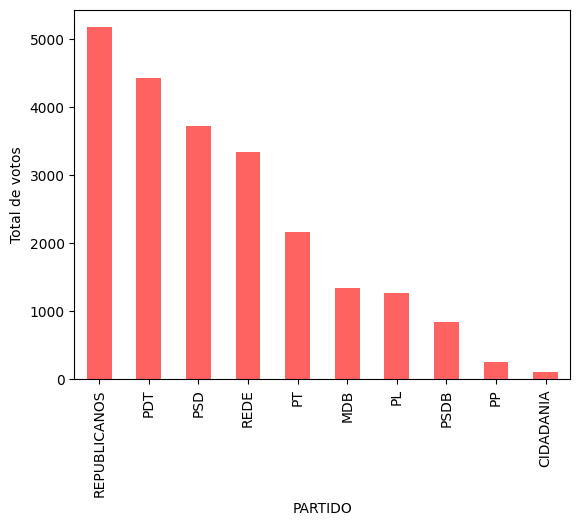

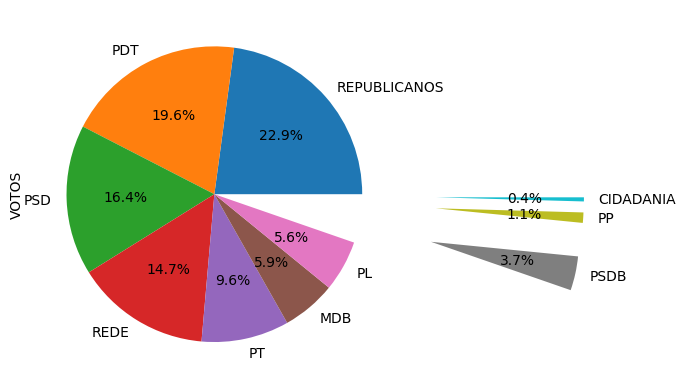

In [19]:
# LE OS PARTIDOS DE CADA VEREADOR E ACRESCENTA ESSA INFORMAÇÃO A TABELA INICIAL
df_vereador_partido = pd.read_csv("vereador-partido.csv", sep=";")
df_partidos = df.merge(df_vereador_partido, on="CANDIDATO")

# Mostra um gráfico de barras
df_partidos_group = df_partidos[["PARTIDO", "VOTOS"]].groupby(by="PARTIDO").sum().sort_values(by="VOTOS", ascending=False)
chart = df_partidos_group.plot(kind="bar", legend=False, color="#ff6361").set_ylabel("Total de votos")

# Mostra um grafico de pizza
valores_explode = [1.5 if x/df_partidos_group["VOTOS"].sum() < 0.05 else 0 for x in df_partidos_group["VOTOS"]]
chart = df_partidos_group.plot(kind="pie", y="VOTOS", legend=False, autopct='%1.1f%%', explode=valores_explode)

<H3> Votação dos partidos por local de votação </H3>
<a id="resultado-partido-por-local"></a>

In [20]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["LOCAL", "SECAO", "PARTIDO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by=["LOCAL"]).aggregate({"SECAO": "unique","VOTOS": "sum"})\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# TRANSFORMA LISTA EM TEXTO
dfg["SECAO"] = dfg["SECAO"].apply(lambda x : ' '.join(x))

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<h3> Votação de cada local dividida por partido </h3>
<a id="resultado-local-por-partido"></a>

In [21]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["LOCAL", "SECAO", "PARTIDO", "VOTOS"]].groupby(by=["LOCAL"])\
.apply(lambda x : x.groupby(by=["PARTIDO"]).aggregate({"SECAO": "unique","VOTOS": "sum"})\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# TRANSFORMA LISTA EM TEXTO
dfg["SECAO"] = dfg["SECAO"].apply(lambda x : ' '.join(x))

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<h3> Votação dentro de cada partido</h3> 
<a id="votacao-dentro-partido"></a>

In [22]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["PARTIDO", "CANDIDATO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by=["CANDIDATO"]).sum()\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

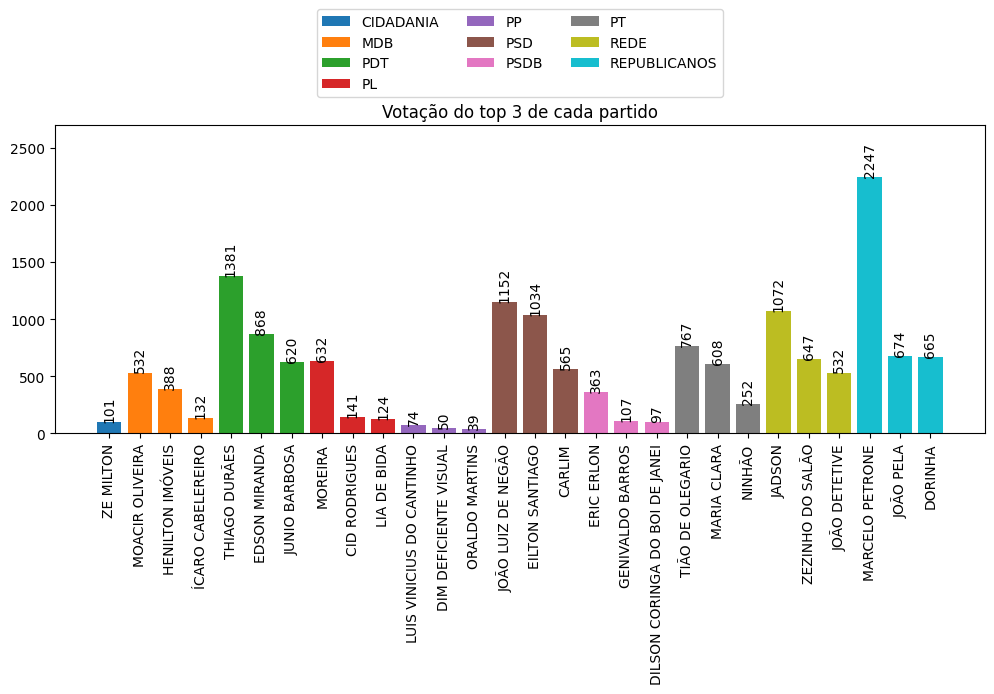

In [23]:
# CALCULA O TOP 3 MAIS VOTADOS DE CADA PARTIDO 
top3 = df_partidos[["PARTIDO", "CANDIDATO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by="CANDIDATO").sum()\
       .sort_values(by="VOTOS", ascending=False).head(3), include_groups=False).sort_index(level=[0, 1])

# SELECIONA A LISTA DE PARTIDOS
partidos = top3.index.get_level_values(0).unique()

figure, ax = plt.subplots()
figure.set_size_inches(12, 4)
plt.xticks(rotation = 90)

linha_legenda = []
for partido in partidos:
    novo_df = top3.iloc[top3.index.get_loc(partido)].reset_index()

    # CRIA UMA COLUNA COM A TABELA
    novo_df["PARTIDO"] = partido

    novo_df = novo_df.sort_values(by="VOTOS", ascending=False)
    
    linha = ax.bar(novo_df["CANDIDATO"], novo_df["VOTOS"], width=0.8, label=partido)
    ax.bar_label(ax.containers[-1], rotation=90)
    linha_legenda.append(linha)

ax.legend(handles = linha_legenda, loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.4))
ax.set_title("Votação do top 3 de cada partido")
ax.margins(y=0.2)

plt.show()
